In [171]:
import pandas as pd ,seaborn as sns, numpy as np ,matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
np.random.seed(0)

In [172]:
l = 141 # Média de chegada por unidade de tempo
µ = 15 # Média de atendimento por unidade de tempo
ncust = 2820 # Número de Seguros no dia
c= 6 # Número de Atendentes
utilization={}

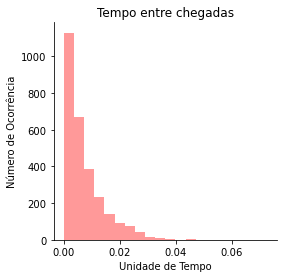

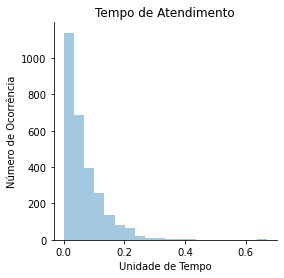

In [173]:
   #Gerando tempo de chegada aleatório por distribuição exponencial
inter_arrival_times= list(np.random.exponential(scale=1/l,size=ncust))
plt.figure(figsize=(4,4))
sns.distplot(inter_arrival_times,kde=False,color='r',bins=20)
plt.title('Tempo entre chegadas')
plt.xlabel('Unidade de Tempo')
plt.ylabel('Número de Ocorrência')
sns.despine()
plt.show()

   #Gerando tempo de atendimento aleatório por distribuição exponencial
service_times = list(np.random.exponential(scale=1/µ,size=ncust))  
plt.figure(figsize=(4,4))
sns.distplot(service_times,kde=False,bins=20)
plt.title('Tempo de Atendimento')
plt.xlabel('Unidade de Tempo')
plt.ylabel('Número de Ocorrência')
sns.despine()
plt.show()

In [174]:
arrival_times= []
finish_times = []

arrival_times = [0 for i in range(ncust)]
finish_times = [0 for i in range(ncust)]
    
arrival_times[0]=round(inter_arrival_times[0],4)#Chegada do primeiro Seguro
#Gerando tempo de chegada dos seguros
for i in range(1,ncust):
    arrival_times[i]=round((arrival_times[i-1]+inter_arrival_times[i]),4)
print(arrival_times)

[0.0056, 0.0145, 0.021, 0.0266, 0.0305, 0.0379, 0.042, 0.0578, 0.0813, 0.0847, 0.0958, 0.1011, 0.1071, 0.1255, 0.126, 0.1266, 0.1267, 0.1394, 0.1501, 0.1646, 0.1919, 0.2033, 0.2077, 0.2185, 0.2194, 0.2266, 0.2277, 0.2482, 0.2534, 0.2572, 0.2594, 0.27, 0.2743, 0.2803, 0.2804, 0.2872, 0.2939, 0.3007, 0.3211, 0.3292, 0.3324, 0.3365, 0.345, 0.3454, 0.3532, 0.3611, 0.3628, 0.3638, 0.3665, 0.3697, 0.3757, 0.3798, 0.4114, 0.4122, 0.4139, 0.4151, 0.4226, 0.4247, 0.4292, 0.4312, 0.4324, 0.4332, 0.4408, 0.4419, 0.4435, 0.4468, 0.459, 0.4597, 0.4726, 0.4733, 0.4999, 0.5044, 0.5311, 0.5377, 0.5472, 0.5475, 0.5499, 0.5508, 0.5533, 0.5542, 0.5569, 0.5607, 0.5612, 0.5696, 0.5755, 0.5777, 0.583, 0.5837, 0.5898, 0.6086, 0.6113, 0.6191, 0.6201, 0.629, 0.6314, 0.6328, 0.6391, 0.6392, 0.6517, 0.6517, 0.6597, 0.6619, 0.6713, 0.6945, 0.6965, 0.7026, 0.709, 0.715, 0.7168, 0.7384, 0.7426, 0.7559, 0.7644, 0.7669, 0.7788, 0.7824, 0.7975, 0.8037, 0.8188, 0.8272, 0.8364, 0.8413, 0.8635, 0.8708, 0.8747, 0.8813, 0.

In [175]:
#Gerando tempo de término de um seguro
finish_times[0]= round((arrival_times[0]+service_times[0]),4)
for i in range(1,ncust):
    previous_finish=finish_times[:i]
    previous_finish.sort(reverse=True)
    previous_finish=previous_finish[:c]
    if i< c:
        finish_times[i] = round(arrival_times[i] + service_times[i],4)
    else:
        finish_times[i]=round((max(arrival_times[i],min(previous_finish))+service_times[i]),4)    
    
 # Tempo total gasto por seguro no sistema
total_times =[abs(round((finish_times[i]-arrival_times[i]),4)) for i in range(ncust)]
    
    # Temp ode espera na fila (Sem ser atendido)
wait_times = [abs(round((total_times[i] - service_times[i]),4)) for i in range(ncust)]

In [176]:
 #Criando Planilha com dados
    
data = pd.DataFrame(list(zip(arrival_times,finish_times,service_times,total_times,wait_times,inter_arrival_times)), 
                columns =['Tempo_de_Chegada','Tempo_de_finalização', 'Tempo_de_atendimento','Tempo_Total','Tempo_de_espera_fila','Tempo_entre_chegadas']) 

#PPrintando a planilha
data.head(10)
    

,Tempo_de_Chegada,Tempo_de_finalização,Tempo_de_atendimento,Tempo_Total,Tempo_de_espera_fila,Tempo_entre_chegadas
0,0.0056,0.1193,0.113683,0.1137,0.0000,0.005645
1,0.0145,0.0604,0.045859,0.0459,0.0000,0.008907
2,0.0210,0.0388,0.017805,0.0178,0.0000,0.006548
3,0.0266,0.0865,0.059890,0.0599,0.0000,0.005583
4,0.0305,0.1356,0.105086,0.1051,0.0000,0.003908
5,0.0379,0.0644,0.026463,0.0265,0.0000,0.007363
6,0.0420,0.1226,0.080594,0.0806,0.0000,0.004082
7,0.0578,0.0976,0.037225,0.0398,0.0026,0.015770
8,0.0813,0.3030,0.221711,0.2217,0.0000,0.023510
9,0.0847,0.1848,0.098251,0.1001,0.0018,0.003430


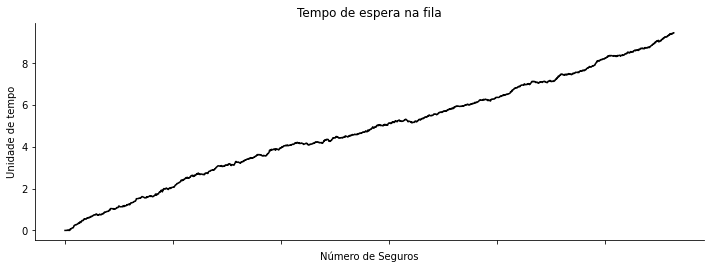

In [177]:
plt.figure(figsize=(12,4))
sns.lineplot(x=data.index,y=wait_times,color='black').set(xticklabels=[])
plt.xlabel('Número de Seguros')
plt.ylabel('Unidade de tempo')
plt.title('Tempo de espera na fila')
sns.despine()
plt.show()

In [178]:
tbe=list([0])
timeline=['Início da Simulação']
for i in range(0,ncust):
    tbe.append(data['Tempo_de_Chegada'][i])
    tbe.append(data['Tempo_de_finalização'][i])
    timeline.append('Seguro ' +str(i+1)+' Chegou')
    timeline.append('Seguro ' +str(i+1)+' Saiu')
        
    
#generating a dataframe with the timeline and description of events
    
timeline = pd.DataFrame(list(zip(tbe,timeline)), 
                columns =['time','Timeline']).sort_values(by='time').reset_index()
timeline=timeline.drop(columns='index')

#printing the first 5 rows of the data
timeline.head(100)
    
    

,time,Timeline
0,0.0000,Início da Simulação
1,0.0056,Seguro 1 Chegou
2,0.0145,Seguro 2 Chegou
3,0.0210,Seguro 3 Chegou
4,0.0266,Seguro 4 Chegou
...,...,...
95,0.4408,Seguro 63 Chegou
96,0.4419,Seguro 64 Chegou
97,0.4435,Seguro 65 Chegou
98,0.4468,Seguro 66 Chegou


In [179]:
#generating the number of customers inside the system at any given time of the simulation
    
timeline['n']=0
x=0
for i in range(1,(2*ncust)-1):
    if len(((timeline.Timeline[i]).split()))>2:
        z=str(timeline['Timeline'][i]).split()[2]
    else:
        continue
    if z =='Chegou':
        x = x+1
        timeline['n'][i]=x
    else:
        x=x-1
        if x==-1:
            x=0
        timeline['n'][i]=x

In [180]:
#computing time between events
t= list()
for i in timeline.index:
    if i == (2*ncust) -2 :
        continue
    if i < 2*ncust:
        x=timeline.time[i+1]
    else:
        x=timeline.time[i]
    y=timeline.time[i]
    t.append(round((x-y),4))
    
t.append(0) 
timeline['tbe']=t

In [181]:
#show results
timeline.head()

,time,Timeline,n,tbe
0,0.0000,Início da Simulação,0,0.0056
1,0.0056,Seguro 1 Chegou,1,0.0089
2,0.0145,Seguro 2 Chegou,2,0.0065
3,0.0210,Seguro 3 Chegou,3,0.0056
4,0.0266,Seguro 4 Chegou,4,0.0039


In [182]:
  #computing the probability and time spent of 'n' customers in the system
    
Pn=timeline.groupby('n').tbe.agg(sum)/sum(t)
Tn=timeline.groupby('n').tbe.agg('count')
timeline.groupby('n').tbe.agg(sum)/sum(t)

n
0      0.000186
1      0.000296
2      0.000970
3      0.000322
4      0.000392
         ...   
872    0.000834
873    0.001954
874    0.001549
875    0.000489
876    0.000133
Name: tbe, Length: 877, dtype: float64

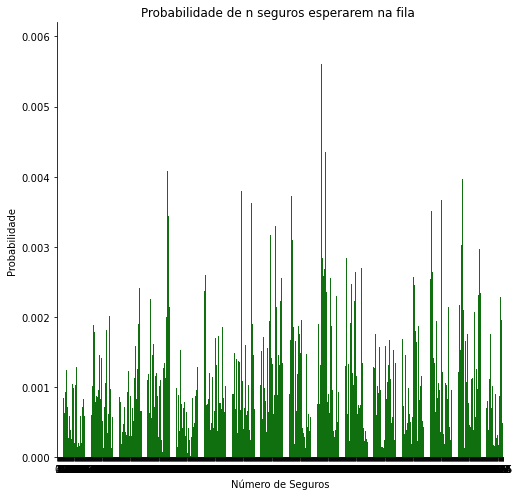

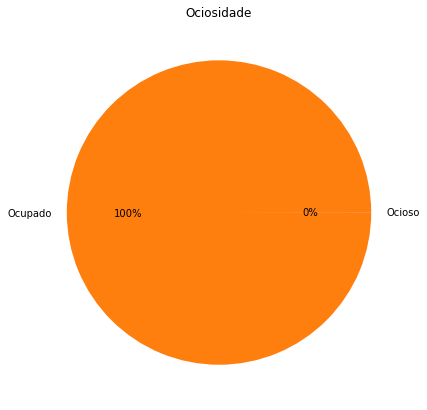

<Figure size 432x288 with 0 Axes>

In [183]:
#plotting results
plt.figure(figsize=(8,8))
sns.barplot(x=Pn.index,y=Pn,color='g')
plt.title('Probabilidade de n seguros esperarem na fila ')
plt.xlabel('Número de Seguros')
plt.ylabel('Probabilidade')
sns.despine()
plt.show()

plt.figure(figsize=(7,7))
#define data
OcId = [Pn[0], 1-Pn[0]]
labels = ['Ocioso', 'Ocupado']
#create pie chart
plt.pie(OcId, labels = labels, autopct='%.0f%%')
plt.title('Ociosidade')
plt.show()
sns.despine()
plt.show()

In [184]:
    #computing expected number of customers in the system
Ls=(sum(Pn*Pn.index))
        
    #computing expected customers waiting in line
Lq=sum((Pn.index[c+1:]-1)*(Pn[c+1:]))
    

In [156]:

# Model Results
print('Resultado:','\n',
     'Subscritores : '+str(c),'\n '
     'Tempo entre chegadas : ',str(data.Tempo_entre_chegadas.mean()),'\n',
     'Tempo de atendimento: (1/µ)',str(data.Tempo_de_atendimento.mean()),'\n'
     ' Utilização (c): ',str((Ls-Lq)/c),'\n',
     'Tempo de espera na fila (Wq):',str(data['Tempo_de_espera_fila'].mean()),'\n',
     'Tempo gasto no sistema (Ws):',str(data.Tempo_Total.mean()),'\n',
     'Número esperado de seguros na fila (Lq):',str(Lq),'\n',
     'Número esperado de seguros no sistema (Ls):',str(Ls),'\n '
     'Número esperado de subscritores ocupados :',str(Ls-Lq),'\n')

Resultado: 
 Subscritores : 6 
 Tempo entre chegadas :  0.007302756600966975 
 Tempo de atendimento: (1/µ) 0.047938441243944196 
 Utilização (c):  0.17221315379318014 
 Tempo de espera na fila (Wq): 1.082082907801416 
 Tempo gasto no sistema (Ws): 1.1300206382978724 
 Número esperado de seguros na fila (Lq): 139.93261936043268 
 Número esperado de seguros no sistema (Ls): 140.96589828319176 
 Número esperado de subscritores ocupados : 1.0332789227590808 

